In [ ]:
import pandas as pd

In [50]:
header_list_base = pd.read_csv('../Dataset/Feature Name.csv')['Feature'][:63]
# read csv file
baseline_min_counter_example_range = pd.read_csv('../Experiments/Baseline/baseline_range_bounds.csv', header=None)

# Initialize lists to store the extracted lower and upper bounds
lower_bounds = []
upper_bounds = []

# Iterate over each cell in the DataFrame
for index, row in baseline_min_counter_example_range.iterrows():
    for cell in row:
        # Check if the cell is not NaN
        if pd.notna(cell):
            # Strip the parentheses and split by comma
            bounds = cell.strip('()').split(',')
            lower_bounds.append(float(bounds[0]))
            upper_bounds.append(float(bounds[1]))

# Create a new DataFrame for the extracted bounds
bounds_df = pd.DataFrame({'Lower Bound': lower_bounds, 'Upper Bound': upper_bounds})

# Display the DataFrame
bounds_df = bounds_df.T
bounds_df.columns = header_list_base

baseline_min_counter_example_range = bounds_df
baseline_min_counter_example_range

Feature,IMU1_GyroX_Mean,IMU1_GyroX_StdDev,IMU1_GyroX_RMS,IMU1_GyroX_Amp,IMU1_GyroY_Mean,IMU1_GyroY_StdDev,IMU1_GyroY_RMS,IMU1_GyroY_Amp,IMU1_GyroZ_Mean,IMU1_GyroZ_StdDev,...,OFS_FIB_MNF,OFS_FIB_MDF,OFS_FIB_IMNF,EMG_EMG_Mean,EMG_EMG_StdDev,EMG_EMG_RMS,EMG_EMG_Amp,EMG_EMG_MNF,EMG_EMG_MDF,EMG_EMG_IMNF
Lower Bound,-21.962146,598.131998,597.075620,2345.952993,-19.282833,242.275529,246.804488,1007.090884,-13.867479,202.87835,...,0.136688,0.149590,0.780915,0.111161,-1.068938,-0.351823,-3.451675,0.231316,0.130534,5.843833
Upper Bound,22.537275,1481.666400,1479.808478,4842.017022,16.607841,463.066484,465.945615,1726.829552,16.162202,371.01908,...,0.571693,0.367776,1.231794,14.780431,9.644464,17.751989,35.212901,0.505730,0.235192,10.535295


In [51]:
header_list_top10= pd.read_csv('../Dataset/Top_LDA_dataset.csv').columns[0:10]
top10_min_counter_example_range = pd.read_csv('../Experiments/Top_LDA/top10_range_bounds.csv', header=None)

# Initialize lists to store the extracted lower and upper bounds
lower_bounds = []
upper_bounds = []

# Iterate over each cell in the DataFrame
for index, row in top10_min_counter_example_range.iterrows():
    for cell in row:
        # Check if the cell is not NaN
        if pd.notna(cell):
            # Strip the parentheses and split by comma
            bounds = cell.strip('()').split(',')
            lower_bounds.append(float(bounds[0]))
            upper_bounds.append(float(bounds[1]))

# Create a new DataFrame for the extracted bounds
bounds_df = pd.DataFrame({'Lower Bound': lower_bounds, 'Upper Bound': upper_bounds})

# Display the DataFrame
bounds_df = bounds_df.T
bounds_df.columns = header_list_top10

top10_min_counter_example_range = bounds_df
top10_min_counter_example_range

,OFS_FIB_MDF,OFS_FIB_MNF,EMG_EMG_MDF,IMU2_AccX_Mean,OFS_FIB_IMNF,IMU2_AccX_RMS,IMU2_AccX_StdDev,EMG_EMG_IMNF,IMU2_AccZ_RMS,IMU2_GyroY_RMS
Lower Bound,0.248683,0.344191,0.172863,10.949437,0.996355,17.928765,12.698905,8.179564,16.527111,198.944343
Upper Bound,0.268683,0.364191,0.192863,10.969437,1.016355,17.948765,12.718905,8.199564,16.547111,198.964343


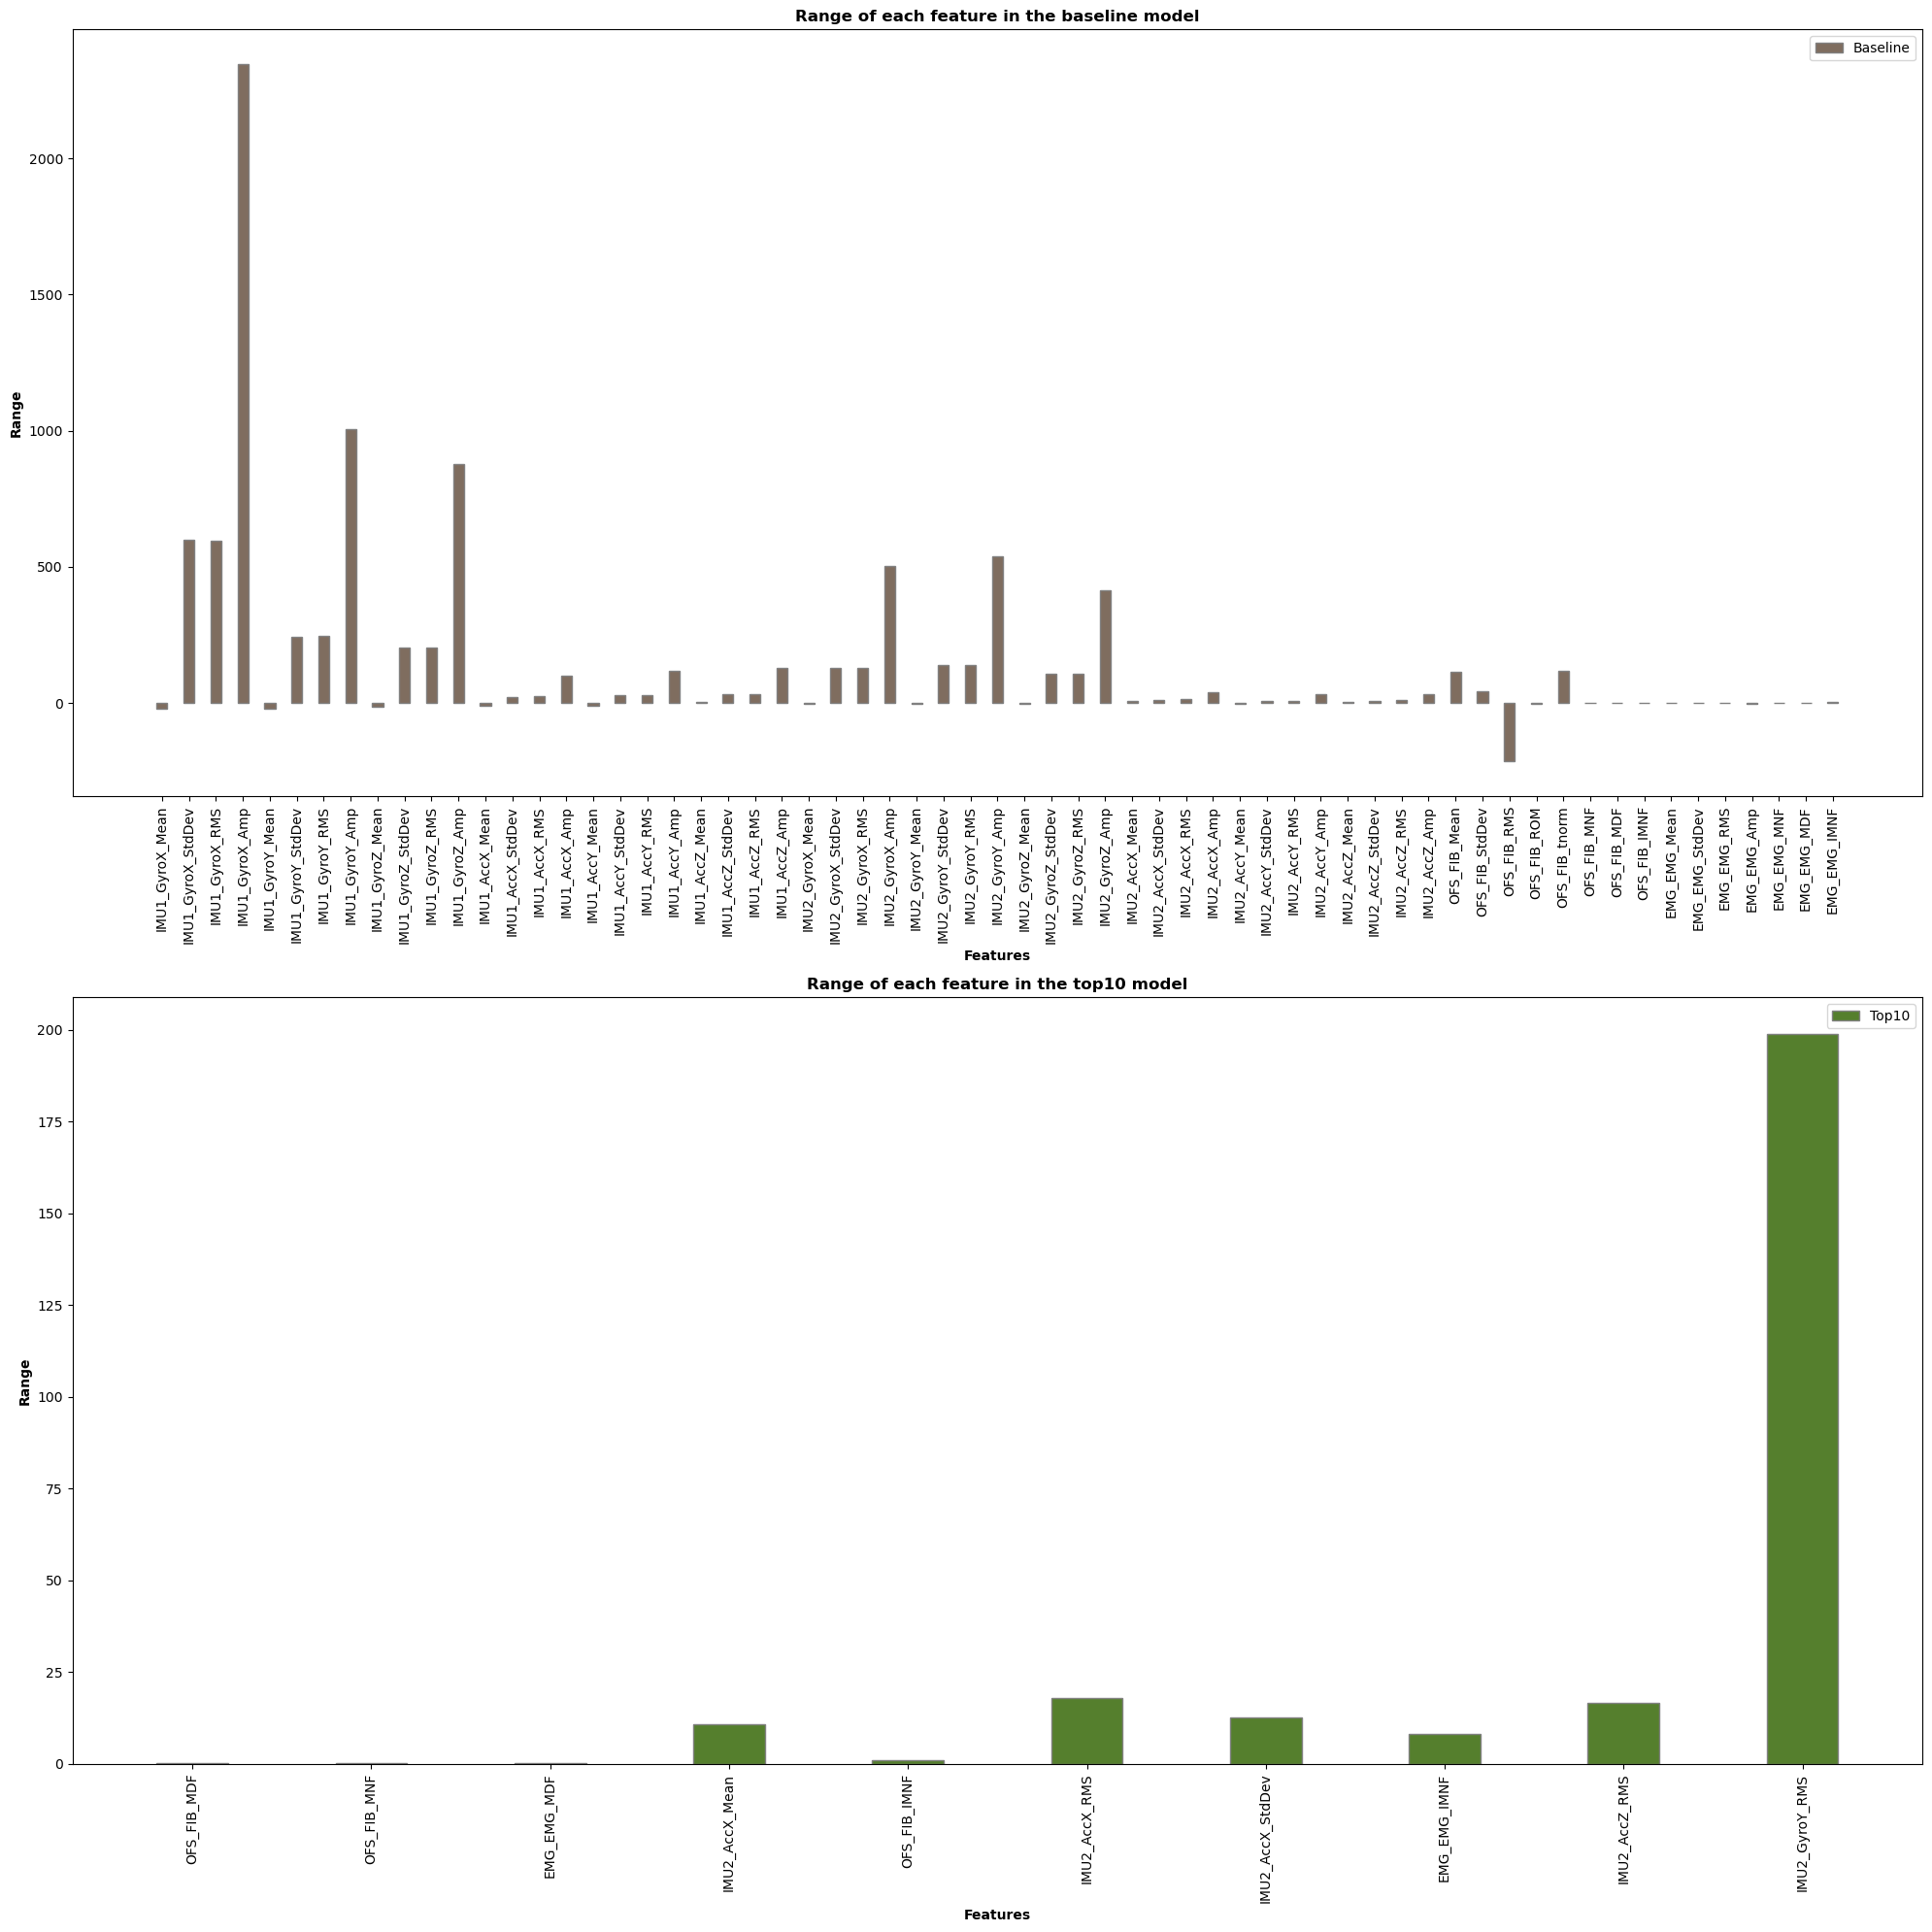

In [52]:
# plot the range of each feature in the baseline model and the top10 model in the two different figures
import matplotlib.pyplot as plt
import numpy as np

bars1 = baseline_min_counter_example_range.iloc[0]
bars2 = top10_min_counter_example_range.iloc[0]

# Set width of bar
barWidth = 0.4

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = np.arange(len(bars2))

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(20, 20))

# Plot for baseline
axs[0].bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='grey', label='Baseline')
axs[0].set_xlabel('Features', fontweight='bold')
axs[0].set_ylabel('Range', fontweight='bold')
axs[0].set_xticks(r1)
axs[0].set_xticklabels(header_list_base, rotation=90)
axs[0].set_title('Range of each feature in the baseline model', fontweight='bold')
axs[0].legend()

# Plot for top10
axs[1].bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='grey', label='Top10')
axs[1].set_xlabel('Features', fontweight='bold')
axs[1].set_ylabel('Range', fontweight='bold')
axs[1].set_xticks(r2)
axs[1].set_xticklabels(header_list_top10, rotation=90)
axs[1].set_title('Range of each feature in the top10 model', fontweight='bold')
axs[1].legend()

# Show plot
plt.tight_layout()
plt.show()

